<a href="https://colab.research.google.com/github/Piyu569/SparkProject02/blob/dev/PySparkPractice2_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM:

1.   premitive types & complex Types for creation of DF
2.   variables:broadcast, accumulators & use them.
3.   regexp_replace, regexp_extract, explode, split, flatten functions,   size() ,sort_array() , sample()  fraction(), drop, fill, dropDuplicates
,withColumn, withColumnRenamed
4.   concat, concat_ws
5.   to_date, to_timestamp, unix_timestamp		(to and from)	
6.    UDFs (User defined functions) 	(It can be defined in sql way or scala udf way both uses different format to define a udf.)
7. Adaptive Query Execution
8. DPP & Predicate Pushdown
9. High level Cluster Configuration

In [ ]:
pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from pyspark import SparkContext
spark = SparkSession.builder.appName("grocaryShop").getOrCreate()
sc = spark.sparkContext

In [ ]:
df1 = (spark.read.format("csv")
                  .option("header", "true")
                  .option("inferSchema", "true")
                  .option("delimiter", ";")
                  .load("/content/Costs.csv"))
df2 = (spark.read.format("csv")
                  .option("header", "true")
                  .option("inferSchema", "true")
                  .option("delimiter", ";")
                  .load("/content/grocery_timestamp.csv"))

df1.printSchema()
df2.printSchema()

root
 |-- product: string (nullable = true)
 |-- demanda: integer (nullable = true)
 |-- price: string (nullable = true)
 |-- unit_cost: string (nullable = true)
 |-- order_cost: integer (nullable = true)

root
 |-- order_id: integer (nullable = true)
 |-- pay_method: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- arrival_ timestamp: timestamp (nullable = true)
 |-- pickup_timestamp: timestamp (nullable = true)
 |-- start_service_time: timestamp (nullable = true)
 |-- finish_service_time: timestamp (nullable = true)
 |-- days_since_prior_order: integer (nullable = true)
 |-- air fresheners candles: integer (nullable = true)
 |-- asian foods: integer (nullable = true)
 |-- baby accessories: integer (nullable = true)
 |-- baby bath body care: integer (nullable = true)
 |-- baby food formula: integer (nullable = true)
 |-- bakery desserts: integer (nullable = true)
 |-- baking ingredients: integer (nullable = true)
 |-- baking supplies decor: integer (nul

In [ ]:
df1.show(5 , False , False)

+----------------------+-------+-----+---------+----------+
|product               |demanda|price|unit_cost|order_cost|
+----------------------+-------+-----+---------+----------+
|air fresheners candles|39     |12,25|10,04    |28        |
|asian foods           |245    |22,95|20,65    |9         |
|baby accessories      |13     |28,92|22,27    |21        |
|baby bath body care   |14     |24,99|20,99    |5         |
|baby food formula     |505    |19,98|15,58    |4         |
+----------------------+-------+-----+---------+----------+
only showing top 5 rows



In [ ]:
df2.show(5,False)

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
no_of_columns_df2=len(df2.columns)
print("no of columns",no_of_columns_df2)
print("no of rows",df2.count())


no of columns 142
no of rows 5004


In [ ]:
Union() vs UnionByName()

SyntaxError: ignored

In [ ]:
df3 = spark.createDataFrame([(1,"KK"),(2,"RKKK"),(3 , "KOP")],["id","name"])
df4 = spark.createDataFrame([(4 , "KOP"),(5, "KLOP")],["id","name"])
u = df3.union(df4)
up = df3.unionByName(df4)
u.show()
up.show()

+---+----+
| id|name|
+---+----+
|  1|  KK|
|  2|RKKK|
|  3| KOP|
|  4| KOP|
|  5|KLOP|
+---+----+

+---+----+
| id|name|
+---+----+
|  1|  KK|
|  2|RKKK|
|  3| KOP|
|  4| KOP|
|  5|KLOP|
+---+----+



In [ ]:
df5 = spark.createDataFrame([(1, 'A'), (2, 'B')], ['id', 'name'])
df6 = spark.createDataFrame([(3, 'C'), (4, 'D')], ['id', 'name'])
ggg=df5.unionByName(df6)
ggg.show()

+---+----+
| id|name|
+---+----+
|  1|   A|
|  2|   B|
|  3|   C|
|  4|   D|
+---+----+



In [ ]:

from pyspark.sql.functions import unix_timestamp,desc, from_unixtime,date_format,col
timeDiff_arrival_and_pickUP =( df2.withColumn("timetaken",unix_timestamp("pickup_timestamp")-unix_timestamp("arrival_ timestamp"))
                                  .withColumn("timetaken",col("timetaken")/60)
                                   .sort(desc("timetaken"))
 )
timeDiff_arrival_and_pickUP.show(4,False)

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
from pyspark.sql.functions import to_timestamp,desc
tt = (
       df2.withColumn("tstamp", to_timestamp("pickup_timestamp")-to_timestamp("arrival_ timestamp"))
          .sort(desc("tstamp"))
)
tt.show(4,False)

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
from pyspark.sql.functions import unix_timestamp
to_unixtimestamp_conversion = (df2.withColumn("puts",unix_timestamp(col("pickup_timestamp")))
                              .withColumn("auts",unix_timestamp(col("arrival_ timestamp")))
                              .withColumn("puts_time",from_unixtime("puts","yyyy:MM:dd HH:mm:ss"))
                              
).show()

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

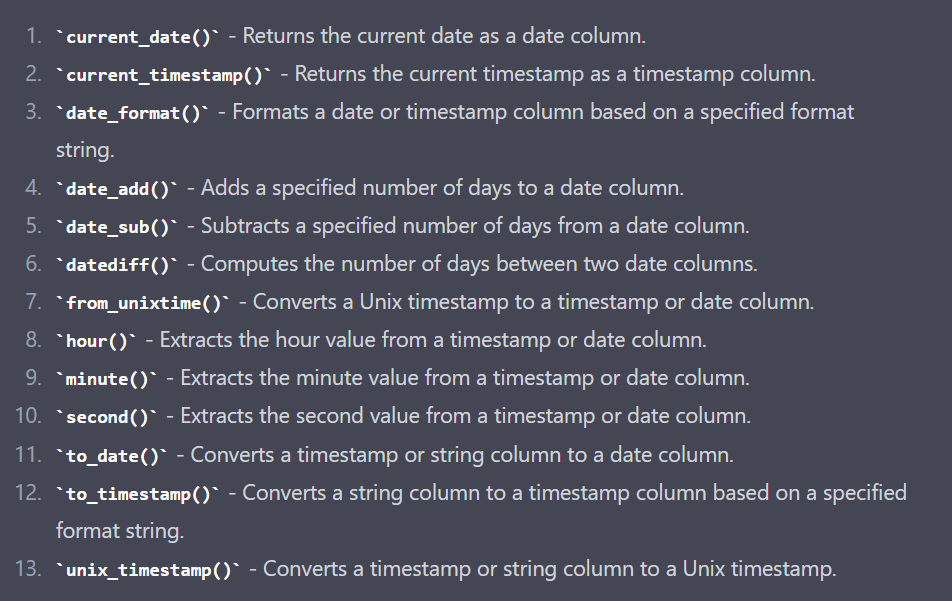

In [ ]:
from pyspark.sql.functions import current_date
current_date_df = df2.select(current_date().alias("cd")).show()

+----------+
|        cd|
+----------+
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
|2023-03-29|
+----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import current_date,date_format,datediff
date_format_df = (df2.withColumn("pickup_date",date_format("pickup_timestamp","dd-MM-yyyy"))
                    .withColumn("arrival_date",date_format("arrival_ timestamp","dd-MM-yyyy"))
                    .withColumn("service_date",date_format("start_service_time","dd-MM-yyyy"))
                    .withColumn("Service_completed",date_format("finish_service_time","dd-MM-yyyy"))
                    .withColumn("DSA",datediff("Service_completed","service_date"))
)
date_format_df.show()

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
from pyspark.sql.functions import datediff

diffrence_of_service_arrival_time = date_format_df.withColumn("DSA",datediff("Service_completed","service_date")).show()

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
sample_df = spark.createDataFrame([(1,'2013-09-23','2016-06-24'),(2,'2014-08-23','2018-02-09')],["id","timestamp_Started","timestamp_Ended"])
sample_df.show()
sample_df.printSchema()

+---+-----------------+---------------+
| id|timestamp_Started|timestamp_Ended|
+---+-----------------+---------------+
|  1|       2013-09-23|     2016-06-24|
|  2|       2014-08-23|     2018-02-09|
+---+-----------------+---------------+

root
 |-- id: long (nullable = true)
 |-- timestamp_Started: string (nullable = true)
 |-- timestamp_Ended: string (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date
to_date_df = sample_df.withColumn("timestamp_Started",to_date("timestamp_Started"))\
                       .withColumn("timestamp_Ended",to_date("timestamp_Ended"))
to_date_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- timestamp_Started: date (nullable = true)
 |-- timestamp_Ended: date (nullable = true)



In [ ]:
from pyspark.sql.functions import months_between
months_between_df = sample_df.withColumn("gap_in_months",months_between(col("timestamp_Ended"),col("timestamp_Started"))).show()

+---+-----------------+---------------+-------------+
| id|timestamp_Started|timestamp_Ended|gap_in_months|
+---+-----------------+---------------+-------------+
|  1|       2013-09-23|     2016-06-24|  33.03225806|
|  2|       2014-08-23|     2018-02-09|   41.5483871|
+---+-----------------+---------------+-------------+



In [ ]:
from pyspark.sql.functions import to_date
to_date_df = df2.withColumn("timestamp_Started",to_date("pickup_timestamp")).show(3)

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
from pyspark.sql.functions import date_add ,date_sub
date_add_sub = df2.withColumn("addition_in_reciving_days",date_add("arrival_ timestamp", 2))\
                             .withColumn("substraction_in_pickup_date",date_sub("pickup_timestamp",2))
date_add_sub.show(5, False)

+--------+----------+-----------------+-------------------+-------------------+-------------------+-------------------+----------------------+----------------------+-----------+----------------+-------------------+-----------------+---------------+------------------+---------------------+------+-------------+-----------------+-----+----------------+-----------------------+----------------------------+----------------------------+----------+------+---------------+-----------------------+------------------------+------------------+-------------------+-------------+------+--------------+-----------------+-----------------+------+----------------+----------+-------------+--------+-----+----------+-------------+---------+---------------+-------------+--------------------------+---------+----+-------------------+--------------------+------------+-----------+-------------+---------+------------+--------------------+------------+-----------+-----------+----------------+-----------------------+

In [ ]:
withColumnRename_df = spark.createDataFrame([(1,"Piyush"),(2,"Hero"),(3,"Don")],["id","Name"])


In [ ]:
withColumnRename_df_prac = withColumnRename_df.withColumnRenamed("id","Meri_id").show()

+-------+------+
|Meri_id|  Name|
+-------+------+
|      1|Piyush|
|      2|  Hero|
|      3|   Don|
+-------+------+



#trunc() in pyspark

In [46]:
from pyspark.sql.functions import col, trunc

# Create a sample DataFrame with a timestamp column
dfooo = spark.createDataFrame([(1, "2022-03-30 10:30:25")], ["id", "timestamp"])

# Truncate the timestamp column to the nearest hour
dfo = dfooo.withColumn("truncated_timestamp", trunc(col("timestamp"), "hour"))

# Display the result
dfo.show()

+---+-------------------+-------------------+
| id|          timestamp|truncated_timestamp|
+---+-------------------+-------------------+
|  1|2022-03-30 10:30:25|               null|
+---+-------------------+-------------------+



# **withColumn vs withColumns**

In [ ]:
from pyspark.sql.functions import lit
tp_df = spark.createDataFrame([(1, "John"), (2, "Jane")], ["id", "name"])
tpp_df = tp_df.withColumn("age",lit(30))
tpp_df.show()

+---+----+---+
| id|name|age|
+---+----+---+
|  1|John| 30|
|  2|Jane| 30|
+---+----+---+



In [ ]:
from pyspark.sql.functions import lit,col
tp_dff = spark.createDataFrame([(1,),(2,),(3,)],["id"])
tp_dfff = tp_dff.withColumns({"Square":col("id")**2,"Cube":col("id")**3})
tp_dfff.show()

+---+------+----+
| id|Square|Cube|
+---+------+----+
|  1|   1.0| 1.0|
|  2|   4.0| 8.0|
|  3|   9.0|27.0|
+---+------+----+



In [45]:
from pyspark.sql.functions import lit,col
k = tp_dff.withColumns({"Square":col("id")**2,"Cube":col("id")**4,"mul_of_2":col("id")*2}).show()

+---+------+----+--------+
| id|Square|Cube|mul_of_2|
+---+------+----+--------+
|  1|   1.0| 1.0|       2|
|  2|   4.0|16.0|       4|
|  3|   9.0|81.0|       6|
+---+------+----+--------+



# .explode() , .split() , .flatter() , fraction() , sample() , arrayType() , MapType()

#Broadcast variable Declaration & use
#Accumaltors Variable Declaration and use

# Define 2 or 3 udfs define them and use them

#AdaptiveQueryExecutionConfufurations